# 1D Derivatives

In this notebook you will work with derivatives, you will derive derivatives of functions in analytical form (for that you may use the table of Derivatives from the 1st task) and approximate them with finite differences.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import json_tricks

answer = {}

# Task 1. 1st order derivatives

Below are 8 functions. For these functions, write the derivatives using numpy.

In [7]:
xs = np.linspace(-10, 10, 100)

def f1(x):
    return 3 * x ** 2 + 5 * x - 7

def f2(x):
    return np.sin(x) + np.cos(x)

def f3(x):
    return x ** 2 * np.exp(x)

def f4(x):
    return (x ** 2 + 1) / (x + 2)

def f5(x):
    return np.log(3 * x ** 2 + 5)

def f6(x):
    return x ** 2 * np.exp(x) / np.log(x)

In [26]:
def df1(x):
    res = 6*x + 5
    return res

def df2(x):
    res = np.cos(x) - np.sin(x)
    return res

def df3(x):
    res = 2*x*np.exp(x) + x**2*np.exp(x)
    return res

def df4(x):
    res = (x ** 2 + 4 * x - 1) / ((x + 2) ** 2)
    return res

def df5(x):
    res = 6 * x / (3 * x ** 2 + 5)
    return res

def df6(x):
    res = ((np.log(x) * np.exp(x) * x) * (x + 2) - x * np.exp(x)) / np.log(x) ** 2
    return res

# Task 2. 2nd order derivatives

For the same functions, write the second order derivatives using numpy.

In [27]:
def ddf1(x):
    res = 6
    ## YOUR CODE HERE
    return res

def ddf2(x):
    res = -np.sin(x) - np.cos(x)
    ## YOUR CODE HERE
    return res

def ddf3(x):    
    res = np.log(x) * (x**2 + 4*x + 2)
    ## YOUR CODE HERE
    return res

def ddf4(x):
    res = 10 / (x + 2) ** 3
    ## YOUR CODE HERE
    return res

def ddf5(x):
    res = -6
    ## YOUR CODE HERE
    return res

def ddf6(x):
    term1 = (np.exp(x) + np.log(x) * np.exp(x) * (x**2 + 4*x + 2)) * (np.log(x))**2
    term2 = ((np.log(x) * np.exp(x) * x) * (x + 2) - x * np.exp(x)) * (2 * np.log(x) / x)

    numerator = term1 - term2
    denominator = (np.log(x))**4
    
    return numerator / denominator

In [28]:
fs = [f1, f2, f3, f4, f5, f6]
dfs = [df1, df2, df3, df4, df5, df6]
ddfs = [ddf1, ddf2, ddf3, ddf4, ddf5, ddf6]

# Task 3. Finite differences

Write a function that calculates finite differences:

$$\frac{df}{dx}(x_i) \approx \frac{f(x_{i + 1}) - f(x_{i})}{x_{i + 1} - x_i}$$

Inputs into this function are:
- values of function $f(x_i)$ as `numpy.array` of shape $N$
- arguments $x_i$ as `numpy.array` of shape $N$

The outputs should be a `numpy.array` with approximate derivatives of shape $N - 1$

In [29]:
def finite_differences(f, x):
    df_x = (f[1:] - f[:-1]) / (x[1:] - x[:-1])
    df_x[np.isnan(df_x)] = 0
    return df_x

# Comparison of finite differences with analytical derivatives

You can play with the code below observing, how granularity of the arguments affect precision of approximation.

- first row is the function itself
- second -- first derivative
- third -- second derivative

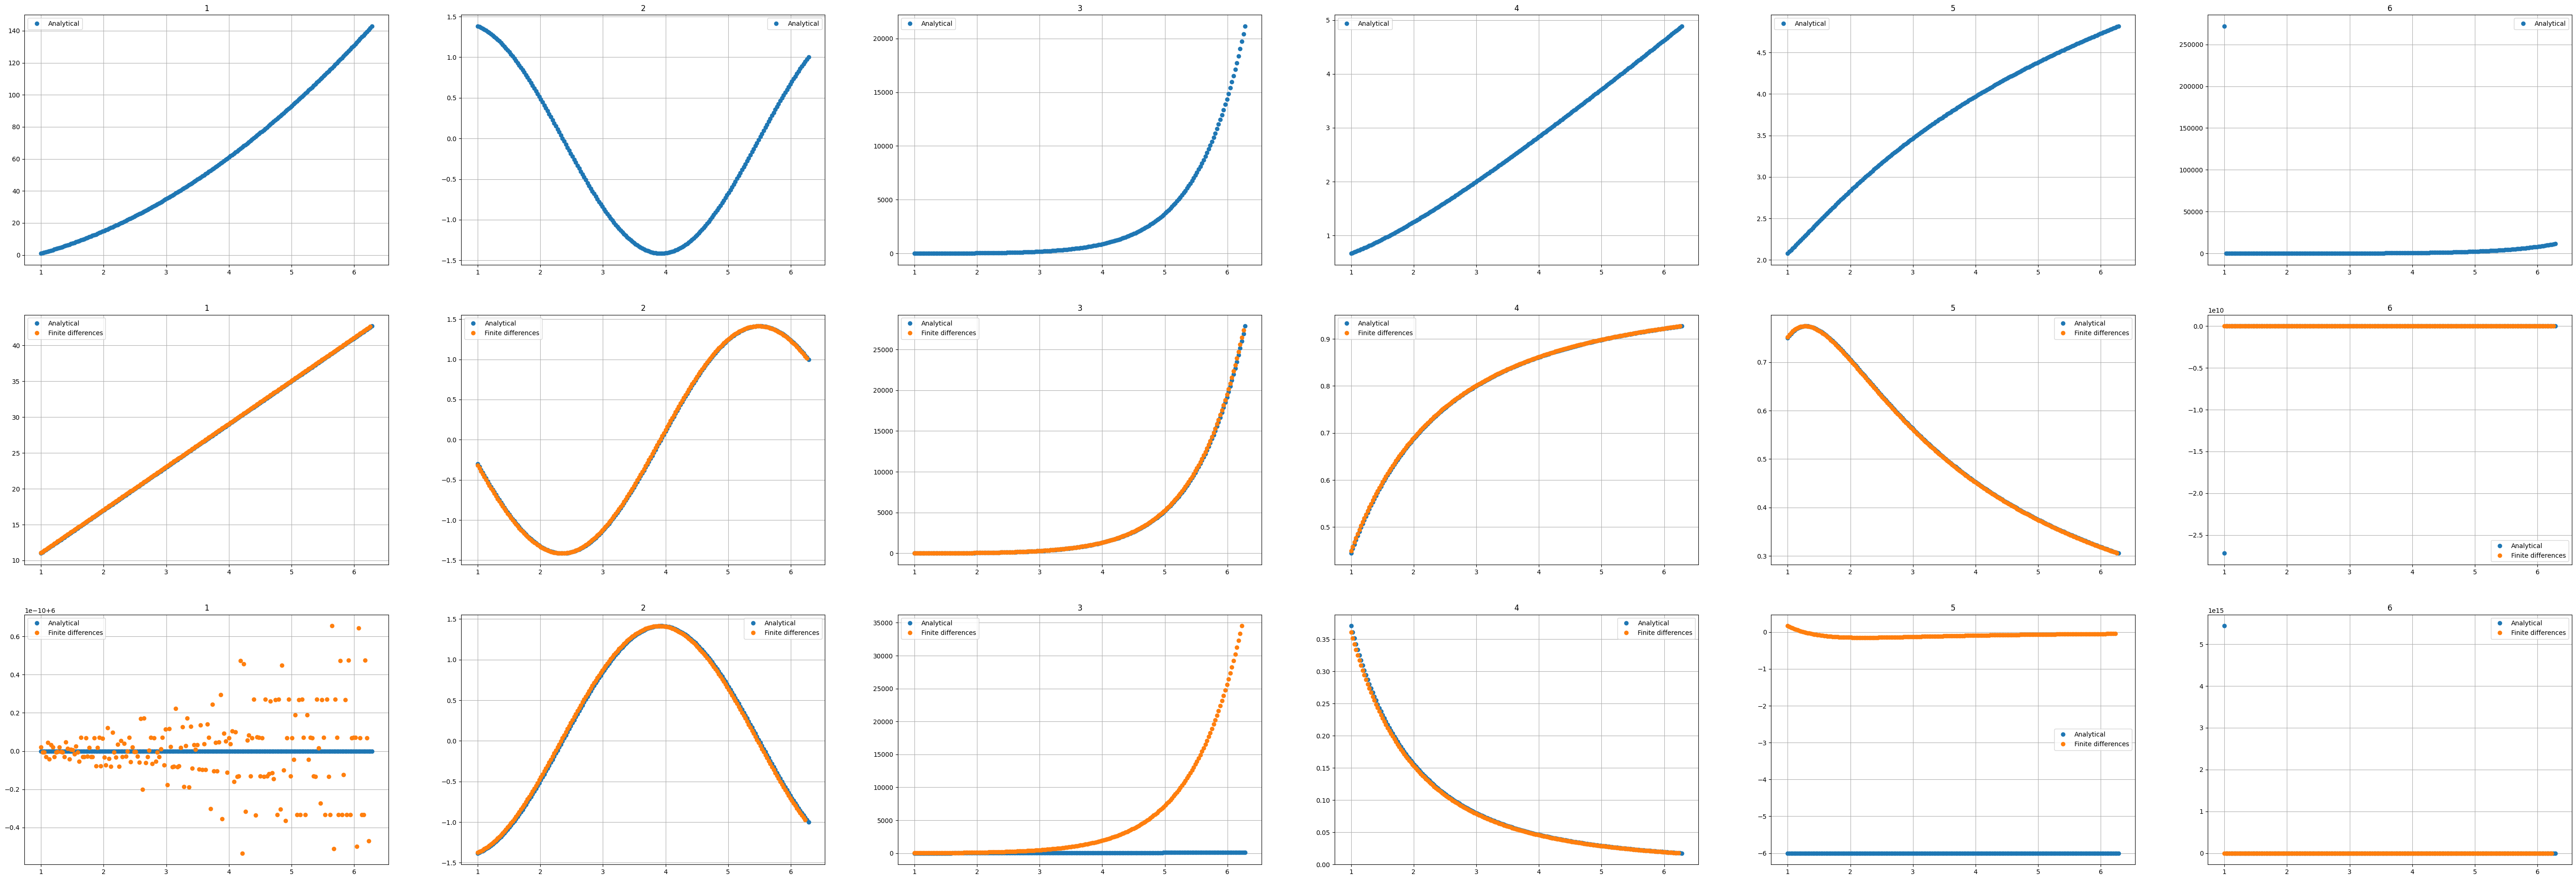

In [31]:
xs = np.linspace(
    1 + 1e-5, 
    2*np.pi, 
    200
)

answer['1D'] = {}

plt.figure(figsize=(96, 24))
index = 0
for f, df, ddf in zip(fs, dfs, ddfs):
    index += 1
    df_x = np.array([df(x) for x in xs], dtype=float)
    ddf_x = np.array([ddf(x) for x in xs], dtype=float)

    df_x_approx = finite_differences(f(xs), xs)
    ddf_x_approx = finite_differences(df_x_approx, xs[:-1])
    
    answer['1D']['d' + str(index)] = df_x[~np.isnan(df_x)]
    answer['1D']['dd' + str(index)] = ddf_x[~np.isnan(ddf_x)]

    answer['1D']['d' + str(index) + '_approx'] = df_x_approx[~np.isnan(df_x_approx)]
    answer['1D']['dd' + str(index) + '_approx'] = ddf_x_approx[~np.isnan(ddf_x_approx)]
    
    plt.subplot(3, 8, index)
    plt.plot(xs, f(xs), 'o')
    plt.legend(['Analytical'])
    plt.grid()
    plt.title(str(index))

    plt.subplot(3, 8, 8 + index)
    plt.plot(xs, df_x, 'o')
    plt.plot(xs[:-1], df_x_approx, 'o')
    plt.legend(['Analytical', 'Finite differences'])
    plt.grid()
    plt.title(str(index))

    plt.subplot(3, 8, 16 + index)
    plt.plot(xs, ddf_x, 'o')
    plt.plot(xs[:-2], ddf_x_approx, 'o')
    plt.legend(['Analytical', 'Finite differences'])
    plt.grid()
    plt.title(str(index))

# 2D Derivatives and Gradients

Below are 2D functions. Find their derivatives for $x$ and $y$ and return them as pair of numpy maps.

Note that for 2D, `x` and `y` coordinates are 2d maps, every number in these maps is a value of $x$ and $y$ coordinates at that point.

`f` is also a map of values of function $f$ for corresponding coordinates $x$ and $y$

Example:

```
x = np.array([
    [1, 2],
    [1, 2]
])

y = np.array([
    [1, 1],
    [2, 2]
])

f = x ** 2 + y ** 2
``` 

In [37]:
def f1(x, y):
    res = np.exp(-0.1 * (x**2 + y**2))
    return res

def f2(x, y):
    res = np.sin(x) * np.cos(y)
    return res

def f3(x, y):
    res = np.sin(x) + np.cos(y)
    return res

def f4(x, y):
    res = -np.exp(-0.2 * (x**2 + y**2)) + 0.5 * np.sin(3*x) * np.sin(3*y)
    return res

def f5(x, y):
    res = np.sin(x * 2) * np.cos(y * 2) + 0.2 * np.sin(5*x) * np.cos(5*y)
    return res

def f6(x, y):
    res = np.sin(5*x) * np.sin(5*y)
    return res

# Task 4. Find gradients of 2D functions

Write functions that calculate the gradients of the functions above. The function should return a tuple of maps $\frac{\partial f}{\partial x}$, $\frac{\partial f}{\partial y}$

In [38]:
def grad_f1(x, y):
    df_dx = -0.2 * x * np.exp(-0.1 * (x**2 + y**2))
    df_dy = -0.2 * y * np.exp(-0.1 * (x**2 + y**2))
    res = (df_dx, df_dy)
    
    return res

def grad_f2(x, y):
    df_dx = np.cos(x) * np.cos(y)
    df_dy = -np.sin(x) * np.sin(y)
    res = (df_dx, df_dy)
    return res

def grad_f3(x, y):
    df_dx = np.cos(x)
    df_dy = -np.sin(y)
    res = (df_dx, df_dy)
    return res

def grad_f4(x, y):
    df_dx = -0.4 * x * np.exp(-0.2 * (x**2 + y**2)) + 1.5 * np.cos(3*x) * np.sin(3*y)
    df_dy = -0.4 * y * np.exp(-0.2 * (x**2 + y**2)) + 1.5 * np.sin(3*x) * np.cos(3*y)
    res = (df_dx, df_dy)
    return res

def grad_f5(x, y):
    df_dx = 2 * np.cos(2*x) * np.cos(y*2) + np.cos(5*x) * np.cos(5*y)
    df_dy = -2 * np.sin(x*2) * np.sin(y*2) - np.sin(5*x) * np.sin(5*y)
    res = (df_dx, df_dy)
    return res

def grad_f6(x, y):
    df_dx = 5 * np.cos(5*x) * np.sin(5*y)
    df_dy = 5 * np.sin(5*x) * np.cos(5*y)
    res = (df_dx, df_dy)
    return res

# Task 4. 2D finite differences

For the map $f$ and for two maps of $x$ and $y$, write a function that calculates an approximate derivative by $x$ and $y$ using finite differences:

$\frac{\partial f}{\partial x} \approx \frac{f_{k + 1,l} - f_{k, l}}{x_{k+1, l} - x_{k, l}}$

$\frac{\partial f}{\partial y} \approx \frac{f_{k,l + 1} - f_{k, l}}{y_{k, l + 1} - y_{k, l}}$

In [43]:
def finite_differences_2d(f, x, y, epsilon=1e-5):
    df_dx = np.zeros_like(f)
    df_dy = np.zeros_like(f)

    dx = x[1:, :] - x[:-1, :]
    dx[dx == 0] = epsilon
    df_dx[:-1, :] = (f[1:, :] - f[:-1, :]) / (x[1:, :] - x[:-1, :] + epsilon)
    df_dx[-1, :] = df_dx[-2, :] 

    dy = y[:, 1:] - y[:, :-1]
    dy[dy == 0] = epsilon
    df_dy[:, :-1] = (f[:, 1:] - f[:, :-1]) / (y[:, 1:] - y[:, :-1] + epsilon)
    df_dy[:, -1] = df_dy[:, -2]
    return df_x, df_dy

# Vizualization

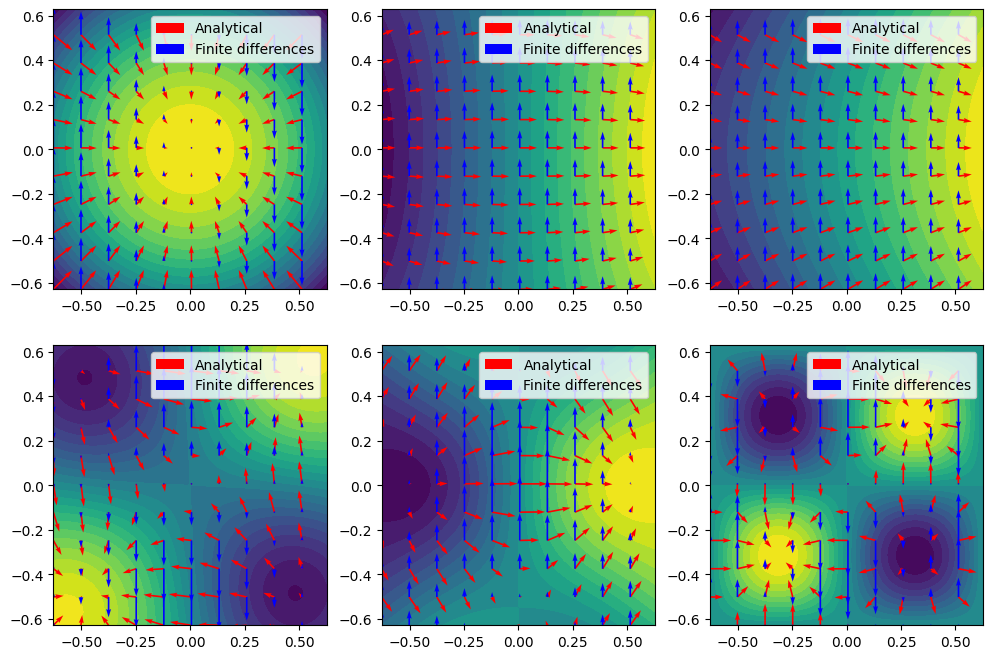

In [44]:
N = 100 # you can change this value. Check 10, 20, 50, 100

xs = np.linspace(-np.pi/5, np.pi/5, N)
ys = np.linspace(-np.pi/5, np.pi/5, N)

XS, YS = np.meshgrid(xs, ys)

fs = [f1, f2, f3, f4, f5, f6]
grad_fs = [grad_f1, grad_f2, grad_f3, grad_f4, grad_f5, grad_f6]

answer['2D'] = {}

plt.figure(figsize=(12, 8))
index = 0
for f, grad_f in zip(fs, grad_fs):
    # print(f)
    index += 1
    fs = f(XS, YS)
    df_x, df_y = grad_f(XS, YS)
    df_x_approx, df_y_approx = finite_differences_2d(fs, XS, YS)
    answer['2D']['grad_' + str(index)] = (df_x[~np.isnan(df_x)], df_y[~np.isnan(df_y)])
    answer['2D']['grad_' + str(index) + '_approx'] = (df_x_approx[~np.isnan(df_x_approx)], df_y_approx[~np.isnan(df_y_approx)])
    

    plt.subplot(2, 3, index)
    plt.contourf(xs, ys, fs, levels=20)
    plt.quiver(
        XS[:-1:10, :-1:10].flatten(),
        YS[:-1:10, :-1:10].flatten(),
        df_x[:-1:10, :-1:10].flatten(),
        df_y[:-1:10, :-1:10].flatten(),
        color='r',
    )
    plt.quiver(
        XS[:-1:10, :-1:10].flatten(),
        YS[:-1:10, :-1:10].flatten(),
        df_x_approx[::10, :-1:10].flatten(), 
        df_y_approx[:-1:10, ::10].flatten(),
        color='b'
    )
    plt.legend(['Analytical', 'Finite differences'])

Observe the plots above
- How do they look like? Do they make sense?
- Do the gradients point in fastest ascent direction?
- Are gradients orthogonal to the levels?



In [ ]:
json_tricks.dump(answer, '.answer.json')